# GP 503
## Assignment 01 - Computing ACF & CCF

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

The Correlation class below implements the following methods-

- **__init__**(algo): algo is either **acf** or **ccf** and to be provided when the Correlation object is created.

- __call__(x, tau, y): This function takes 2 parameters for algo = **acf** or 3 parameters for algo = **ccf** and a parameter tau(lag).

- **acf**(x, tau): Implemented function for calculating the acf of a time series signals by padding them first and then performing dot product for all discrete values in range of **tau**.

- **ccf**(x, y, tau): Implemented function for calculating the ccf of two distinct time series signals (need not be equal in length) by padding them first and then performing dot product for all discrete values in range of **tau**.

- **autocorrelate**(x, tau): Modified the builtin function **numpy.correlate()** to compute the Auto Correlation of a signal for discrete values in range of **tau** and store values for plotting.

- **crosscorrelate**(x, y, tau): Modified the builtin function **numpy.correlate()** to compute the Cross Correlation of two signal for discrete values in range of **tau** and store values for plotting.

- **plot**(): Plots the values of acf/ccf w.r.t values in the range of tau.

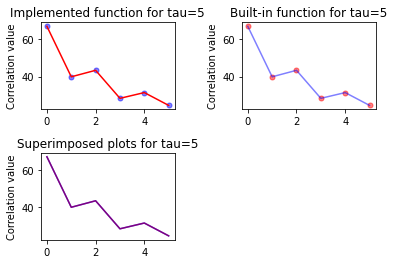

In [65]:
class Correlation(object):

    def __init__(self, algo):
        self.outputs = None
        self.tau = None
        self.step = 0
        self.algo = algo

    def __call__(self, x, tau, y=[]):
        self.tau = tau
        self.outputs = []
        self.op = []

        if self.algo == 'acf':
            if tau >= 0:
                for tau_i in range(0, tau):
                    self.outputs.append(self.acf(x, tau_i))
                self.outputs.append(self.acf(x, tau))
            else:
                for tau_i in range(tau, 0):
                    self.outputs.append(self.acf(x, tau_i))
                self.outputs.append(self.acf(x, 0))

            self.op = self.autocorrelate(x, tau)
            self.plot()
        else:
            if len(y) == 0:
                print('Correlation("ccf") take 3 positional arguments but 2 were given\n')
            else:
                if tau >= 0:
                    for tau_i in range(0, tau):
                        self.outputs.append(self.ccf(x, y, tau_i))
                    self.outputs.append(self.ccf(x, y, tau))
                else:
                    for tau_i in range(tau, 0):
                        self.outputs.append(self.ccf(x, y, tau_i))
                    self.outputs.append(self.ccf(x, y, 0))

                self.op = self.crosscorrelate(x, y, tau)
                self.plot()

    def acf(self, x, tau):
        if abs(tau) > x.shape[0]:
            return np.asarray([0])

        zero_pads = [0] * abs(tau)
        N = x.shape[0]
        if tau >= 0:
            x_i = np.asarray(x.tolist() + zero_pads)
            x_j = np.asarray(zero_pads + x.tolist())
        else:
            x_i = np.asarray(zero_pads + x.tolist())
            x_j = np.asarray(x.tolist() + zero_pads)
        # print('\t Padded sequence A -> %s' % data_i)
        # print('\t Padded sequence B -> %s\n' % data_j)
        return (x_i @ x_j) / N

    def ccf(self, x, y, tau):
        if tau >= x.shape[0]:
            return np.asarray([0])
        elif tau <= -y.shape[0]:
            return np.asarray([0])

        delta = x.shape[0] - y.shape[0]
        if x.shape[0] < y.shape[0]:
            N = y.shape[0]
            delta = -delta
            x = np.asarray(x.tolist() + [0] * delta)
        else:
            N = x.shape[0]
            y = np.asarray(y.tolist() + [0] * delta)

        zero_pads = [0] * abs(tau)
        if tau >= 0:
            x = np.asarray(x.tolist() + zero_pads)
            y = np.asarray(zero_pads + y.tolist())
        else:
            x = np.asarray(zero_pads + x.tolist())
            y = np.asarray(y.tolist() + zero_pads)
        # print('\t Padded sequence A -> %s' % data_i)
        # print('\t Padded sequence B -> %s\n' % data_j)
        return (x @ y) / N

    def autocorrelate(self, x, tau):
        N = x.shape[0]
        if tau >= N:
            delta = tau - N + 1
            return np.asarray(np.correlate(x, x, 'full').tolist()[N - 1:] + [0] * delta) / N
        elif tau <= -N:
            delta = abs(tau + N) + 1
            return np.asarray([0] * delta + np.correlate(x, x, 'full').tolist()[:N]) / N
        elif tau > 0:
            return np.correlate(x, x, 'full')[N - 1:tau + N] / N
        else:
            return np.correlate(x, x, 'full')[tau + N - 1:N] / N
            
    def crosscorrelate(self, x, y, tau):
        N = max(x.shape[0], y.shape[0])
        if tau >= x.shape[0]:
            delta = tau - x.shape[0] + 1
            return np.asarray(np.correlate(x, y, 'full').tolist()[y.shape[0] - 1:] + [0] * delta) / N
        elif tau <= -y.shape[0]:
            delta = abs(tau + y.shape[0]) + 1
            return np.asarray([0] * delta + np.correlate(x, y, 'full').tolist()[:y.shape[0]]) / N
        elif tau > 0:
            return np.correlate(x, y, 'full')[y.shape[0] - 1:tau + y.shape[0]] / N
        else:
            return np.correlate(x, y, 'full')[tau + y.shape[0] - 1:y.shape[0]] / N

    def plot(self):
        if self.tau >= 0:
            ordinates = np.arange(tau + 1)
        else:
            ordinates = np.arange(tau, 1)
        # print('\tTau Values ->         %s' % ordinates)
        # print('\tCorrelation Values -> %s' % self.outputs)
        fig, axs = plt.subplots(2, 2)

        (ax1,ax2), (ax3, ax4) = axs

        ax1.plot(ordinates, self.outputs, 'b.', alpha=0.5, ms=10)
        ax1.plot(ordinates, self.outputs, 'r-')
        ax1.set_title("Implemented function for tau=%i"%self.tau)
        ax1.set_ylabel('Correlation value')

        ax2.plot(ordinates, self.op, 'r.', alpha=0.5, ms=10)
        ax2.plot(ordinates, self.op, 'b-', alpha=0.5, ms=10)
        ax2.set_title("Built-in function for tau=%i"%self.tau)
        ax2.set_ylabel('Correlation value')

        ax3.plot(ordinates, self.outputs, 'b-')
        ax3.plot(ordinates, self.op, 'r-', alpha=0.5, ms=10)
        ax3.set_title("Superimposed plots for tau=%i"%self.tau)
        ax3.set_ylabel('Correlation value')

        ax4.axis('off')

        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        plt.show()

## Input format-  

1. Run the file in the terminal using `python3 assign1.py`

2. Enter **0** for providing input using a **.txt file** or, **1** for providing input in terminal.

### Terminal input format-

1. Enter three space seperated integers **least_value** **max_value** **size** for series A.

2. Enter an integer specifying the value of **tau**.

3. Enter the algo type **acf** or **ccf**.

    - If algo type **ccf**, enter three space seperated integers **least_value** **max_value** **size** for series B.

### Input file format-

Multiple inputs can be provided at once and plots of all can be viewed in a sequential manner. Sample inputs are shown below-

    0 20 10
    5
    acf
    0 100 500
    65
    ccf
    0 50 75

> Line 1 specifies the **least_value** **max_value** **size** for series A for first input. Line 2 is the value of **tau**. Line 3 is the algo type. If **acf** then first input ends here.

> Line 4 specifies the **least_value** **max_value** **size** for series A for secod input. Line 5 is the value of **tau**. Line 6 is the algo type. If **ccf** then the next line should contain **least_value** **max_value** **size** for series B.


In [64]:
if __name__ == '__main__':
    option = bool(int(input('Provide one of the options \n\t 0 -> Use a text file to provide input\n\t 1 -> Provide input in terminal\n')))
    if option:
        first_samp_i, last_samp_i, num_samp_i = [int(i) for i in input("Enter LeastValue MaximumValue Size for sequence A:\n").strip().split()]
        data_i = np.random.randint(first_samp_i, last_samp_i, num_samp_i)
        # print(data_i)
        tau = int(input('Enter a value for lag (tau):\n'))
        algo = str(input("Enter the type of Correlation, acf or ccf\n"))
        if algo == 'ccf':
            first_samp_j, last_samp_j, num_samp_j = [int(i) for i in input("Enter LeastValue MaximumValue Size for sequence B:\n").strip().split()]
            data_j = np.random.randint(first_samp_j, last_samp_j, num_samp_j)
            # print(data_j)
            corr = Correlation('ccf')
            corr(data_i, tau, data_j)
        elif algo == 'acf':
            corr = Correlation('acf')
            corr(data_i, tau)
        else:
            print('UndefinedParameter passed. Valid values are "acf" and "ccf"\n')
    else:
        f = str(input('Provide location of the input file\n').strip())
        file = open(f, 'r')
        line = file.readline()
        while line:
            first_samp_i, last_samp_i, num_samp_i = [int(i) for i in line.strip().split()]
            data_i = np.random.randint(first_samp_i, last_samp_i, num_samp_i)
            tau = int(file.readline().strip())
            algo = str(file.readline().strip())
            if algo == 'ccf':
                first_samp_j, last_samp_j, num_samp_j = [int(i) for i in file.readline().strip().split()]
                data_j = np.random.randint(first_samp_j, last_samp_j, num_samp_j)
                # print(data_j)
                corr = Correlation('ccf')
                corr(data_i, tau, data_j)
            elif algo == 'acf':
                corr = Correlation('acf')
                corr(data_i, tau)
            line = file.readline()